In [16]:
# Read all the indivual csv files for tests into 1 dataframe
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import glob
warnings.filterwarnings('ignore')

path = '../output' # use your path

all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    if filename != ('../output\sample_output.csv'):
        df = pd.read_csv(filename)
        df['filename'] = filename
        li.append(df)
frame = pd.concat(li, axis=0, ignore_index=False)
frame.columns = [c.replace(' ', '_') for c in frame.columns]
frame=frame.replace({'filename' : { '../output\\test_2_output.csv' : '2',
                                             '../output\\test_3_output.csv' : '3',
                                             '../output\\test_4_output.csv' : '4',
                                             '../output\\test_5_output.csv' : '5',                            
                                             '../output\\test_6_output.csv' : '6',                            
                                             '../output\\test_7_output.csv' : '7',
                                             '../output\\test_8_output.csv' : '8',
                                              '../output\\test_9_output.csv' : '9',                                  
                                             '../output\\test_11_output.csv' : '11',
                                             '../output\\test_12_output.csv' : '12',
                                             '../output\\test_14_output.csv' : '14',                                   
                                             '../output\\test_15_output.csv' : '15'}})

years = ['2','3','4','7','8']
frame=frame[frame.filename.isin(years)]

,Review_ID,Actual_Dishname,Actual_Sentiment,Predicted_Dishname,Predicted_Sentiment,Categorical_Predicted_Sentiment_,ARI,Coleman-Liau,DaleChallIndex,FleschReadingEase,GunningFogIndex,Kincaid,LIX,RIX,SMOGIndex,Dish_extraction_recall,Sentiment_extraction_recall,Dish_extraction_precision,filename
0,sUTJxFl9oYPuwDZuayASaA,"FISH TACOS,Fresh strawberry cheesecake","1,1",FISH TACOS,"neutral,-100","0,nan",84.094386,9.024134,17.104416,-74.087895,72.844444,66.074269,189.128655,31.0,26.874673,0.500000,0.000000,0.333333,2
1,5TFa5-MAvO2Blzn0totkAw,"KOREAN FRIED CAULIFLOWER,CHICKEN PARMESAN “PIZ...","1,1,1,1,-1","FRESH BANANA CREAM CHEESECAKE,SALTED CARAMEL C...","-100,-100,-100,neutral,neutral","nan,nan,nan,0,0",27.468814,7.914730,11.647815,52.312712,26.989831,20.620000,67.474576,5.0,15.247449,0.400000,0.000000,0.400000,2
2,g5llHuTSFFPhhbqU3s5XfA,"FACTORY HUEVOS RANCHEROS,BREAKFAST BURRITO,CHO...","1,1,1",CHOCOLATE HAZELNUT CRUNCH CHEESECAKE,"-100,-100,positive","nan,nan,1",237.782875,8.122448,31.227521,-385.233750,195.000000,186.237083,492.291667,59.0,35.863353,0.333333,0.333333,0.166667,2
3,YrfC6jCcFHQce_SvtiQ8dQ,"Oreo DREAM EXTREME CHEESECAKE,LEMON MERINGUE C...","1,1,1","LEMON MERINGUE CHEESECAKE,CARROT CAKE","-100,positive,positive","nan,1,1",52.731009,8.472085,13.099047,-7.803670,47.269725,41.426422,120.926606,13.0,20.320508,0.666667,0.666667,0.500000,2
4,YxkO9eyGJIUA6qt4dxQ3rQ,"CHICKEN MADEIRA,SHRIMP SCAMPI,CHOCOLATE HAZELN...","1,1,1","CHICKEN MADEIRA,SHRIMP SCAMPI,CHOCOLATE HAZELN...","positive,positive,positive","1,1,1",105.052938,10.253569,18.666982,-126.411517,90.276777,83.309479,232.800948,46.0,33.495901,1.000000,1.000000,0.750000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,ImCMjreTNy0hWTwLHnXl-w,CRISPY CHICKEN COSTOLETTA,1,CRISPY CHICKEN COSTOLETTA,negative,-1,113.653621,7.895199,18.955079,-127.831207,95.558621,88.724483,246.224138,33.0,24.908902,1.000000,0.000000,0.500000,8
13,qE8rQiwR5L0ZT1YPl8Z2PA,FOUR CHEESE PASTA,-1,FOUR CHEESE PASTA,neutral,0,43.013059,11.244299,13.796971,-4.847059,40.588235,35.051765,107.352941,19.0,23.493902,1.000000,0.000000,0.333333,8
14,k-8fE2bpm045hfgN9zM1gg,ORANGE CHICKEN,1,ORANGE CHICKEN,neutral,0,37.561558,9.396116,12.172194,16.612468,33.916883,30.071169,93.883117,13.0,16.416408,1.000000,0.000000,0.500000,8
15,f4DjJ2GRgwzSlyfqAb-Gig,GRILLED STEAK MEDALLIONS,1,GRILLED STEAK MEDALLIONS,positive,1,58.532810,8.251578,12.900497,-22.953554,52.036364,46.520661,138.355372,21.0,21.165902,1.000000,1.000000,1.000000,8


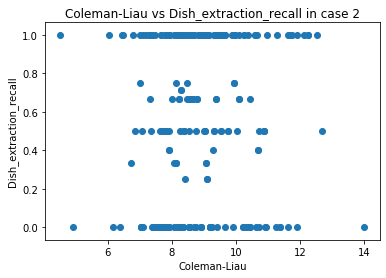

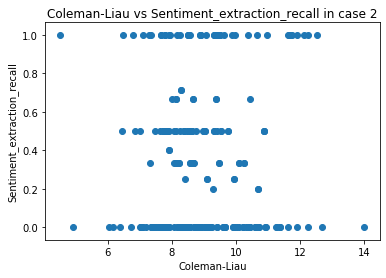

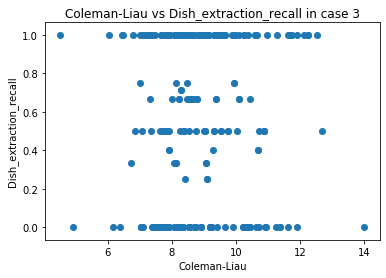

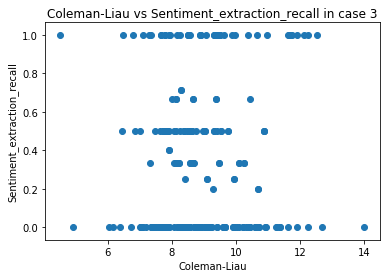

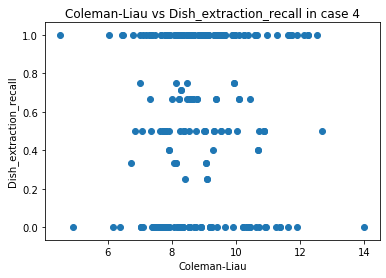

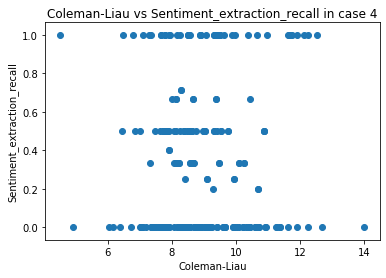

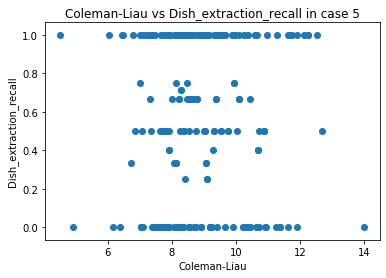

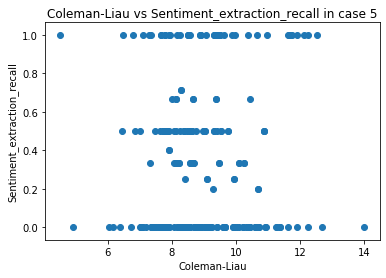

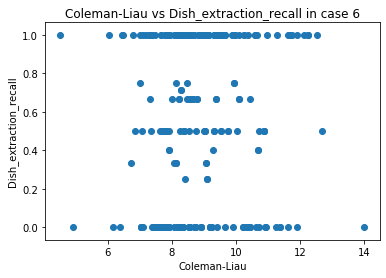

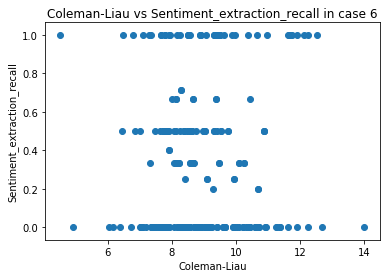

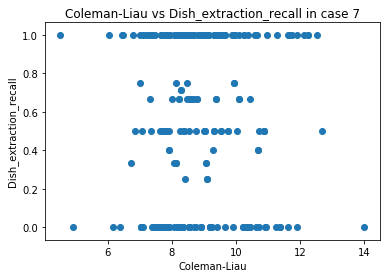

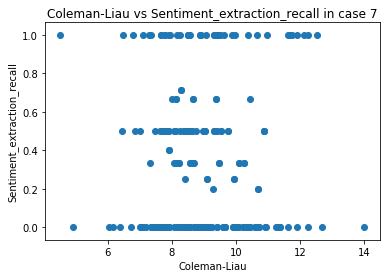

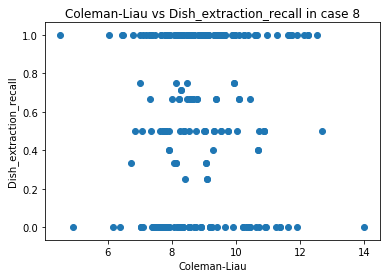

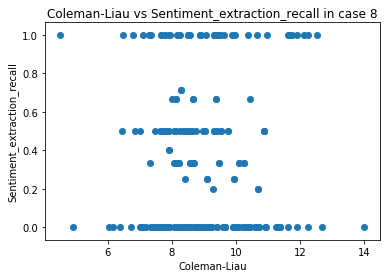

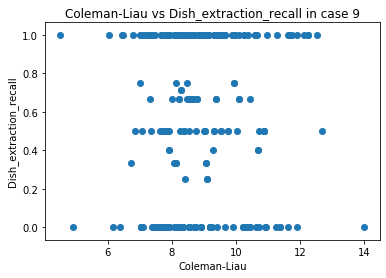

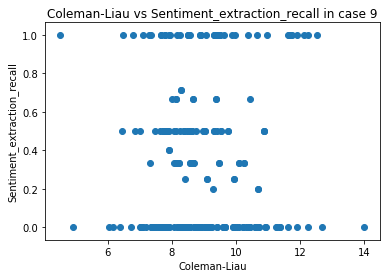

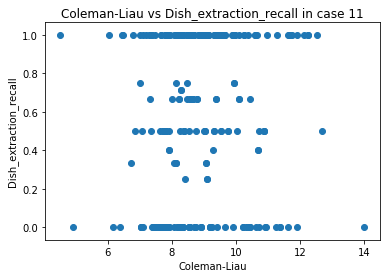

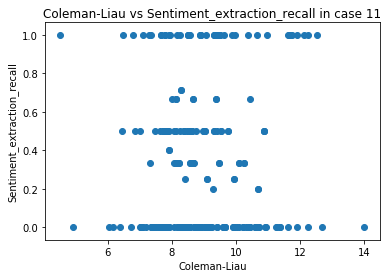

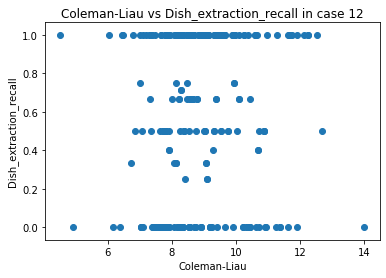

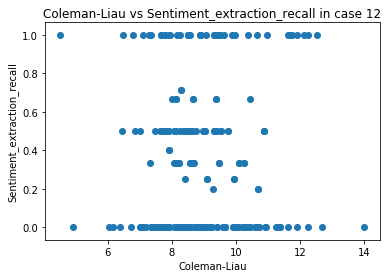

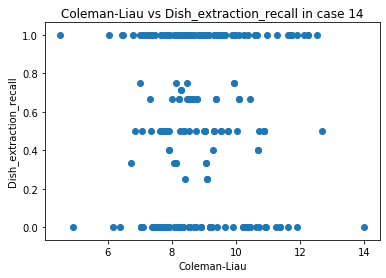

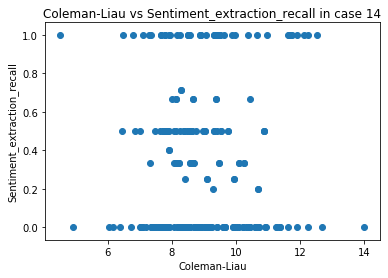

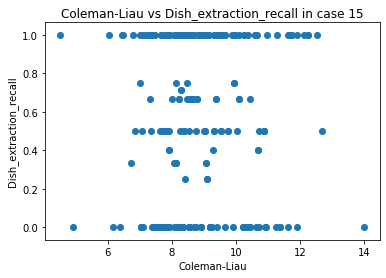

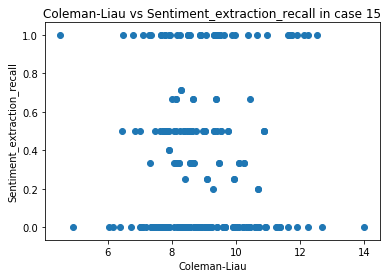

In [6]:
#Scatter plot for grammaticality score vs recall for individual cases
x_columns = ["Coleman-Liau"]
y_columns = ["Dish_extraction_recall",'Sentiment_extraction_recall',]
z_columns =['2','3','4','5','6','7','8','9','11','12','14','15']

for z_col in z_columns:
    for x_col in x_columns:
        for y_col in y_columns:
            figure = plt.figure
            ax = plt.gca()
            ax.scatter(frame[x_col], frame[y_col])
            ax.set_xlabel(x_col)
            ax.set_ylabel(y_col)
            ax.set_title("{} vs {} in case {}" .format(x_col, y_col,z_col))
            plt.show()

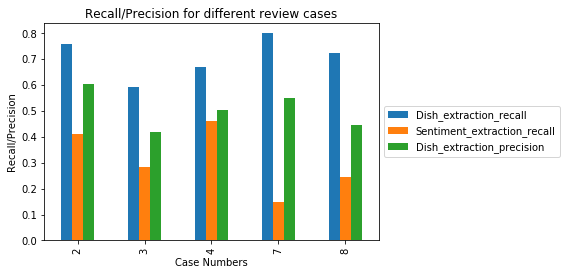

In [26]:
#Comparison of sentiment recall , dish recall and total numbers across all the cases
import matplotlib.pyplot as plt

grouped_frame=frame.groupby(['filename']).agg({   
         'Dish_extraction_recall':'mean',    # mean per group
         'Sentiment_extraction_recall': 'mean' ,  # mean per group
         'Dish_extraction_precision': 'mean', # mean per group
         'filename': 'count'   # count per group 
          })
grouped_frame=grouped_frame.rename(columns={'filename':'Total_Numbers'})
grouped_frame.reset_index(level=0, inplace=True)
grouped_frame.plot(x="filename", y=["Dish_extraction_recall", "Sentiment_extraction_recall","Dish_extraction_precision"], kind="bar")
plt.xlabel('Case Numbers')
plt.ylabel('Recall/Precision')
plt.title('Recall/Precision for different review cases')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('../output\\result.png',bbox_inches='tight', pad_inches=0)
plt.show()

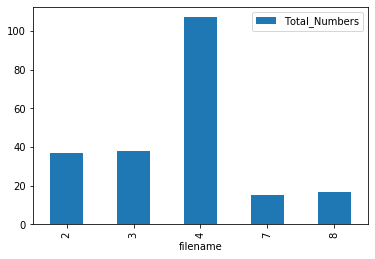

In [27]:
grouped_frame.plot(x="filename", y="Total_Numbers", kind="bar")